# Constraint programming (CP)
- 최적치를 찾는 것보다, 주어진 조건들을 만족시키는 해를 찾는 작업
- 목적함수가 없는 경우도 있다.
- 즉, 최적화 문제가 아니라(optimization) 타당성(feasibility)을 만족시키는 문제이다.
- 크고 복잡한 문제를, 다룰 수 있는 작은 문제로 나누는 경우에 사용
 - 예: 작업자를 8시간씩 적절한 조건에 맞게 일에 배정하는 문제 (각자 조건이 다르다)

## CP-SAT solver 사용
- SAT: satisfiability

In [11]:
!pip install ortools

You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
import ortools

In [13]:
# from __future__ import absolute_import
# from __future__ import division
# from __future__ import print_function

from ortools.sat.python import cp_model

## 간단한 문제
- 세개의 변수 x, y, z가 셋 중의 하나의 값을 가질 수 있다: 0, 1, or 2.
- 제약 조건은 : x ≠ y
- 최적화 해를 구하는 것이 아니라 CP 문제로 풀어보겠다

In [14]:
# 모델 생성
model = cp_model.CpModel()

# 변수 생성 (세개의 변수가 각각 0, 1, 2 범위의 값을 갖는다)
num_vals = 3
x = model.NewIntVar(0, num_vals - 1, 'x')
y = model.NewIntVar(0, num_vals - 1, 'y')
z = model.NewIntVar(0, num_vals - 1, 'z')

# 제약 조건
model.Add(x != y)

#  solver 생성 및 모델 문제 풀이
solver = cp_model.CpSolver()
status = solver.Solve(model)
print("status = ", status)
print('status name = %s' % solver.StatusName(status))
if status == cp_model.OPTIMAL:
    # 임의의 첫번째 답을 얻는다
    print('x = %i' % solver.Value(x))
    print('y = %i' % solver.Value(y))
    print('z = %i' % solver.Value(z))


status =  4
status name = OPTIMAL
x = 1
y = 0
z = 0


- status: 0,1,2,3,4:
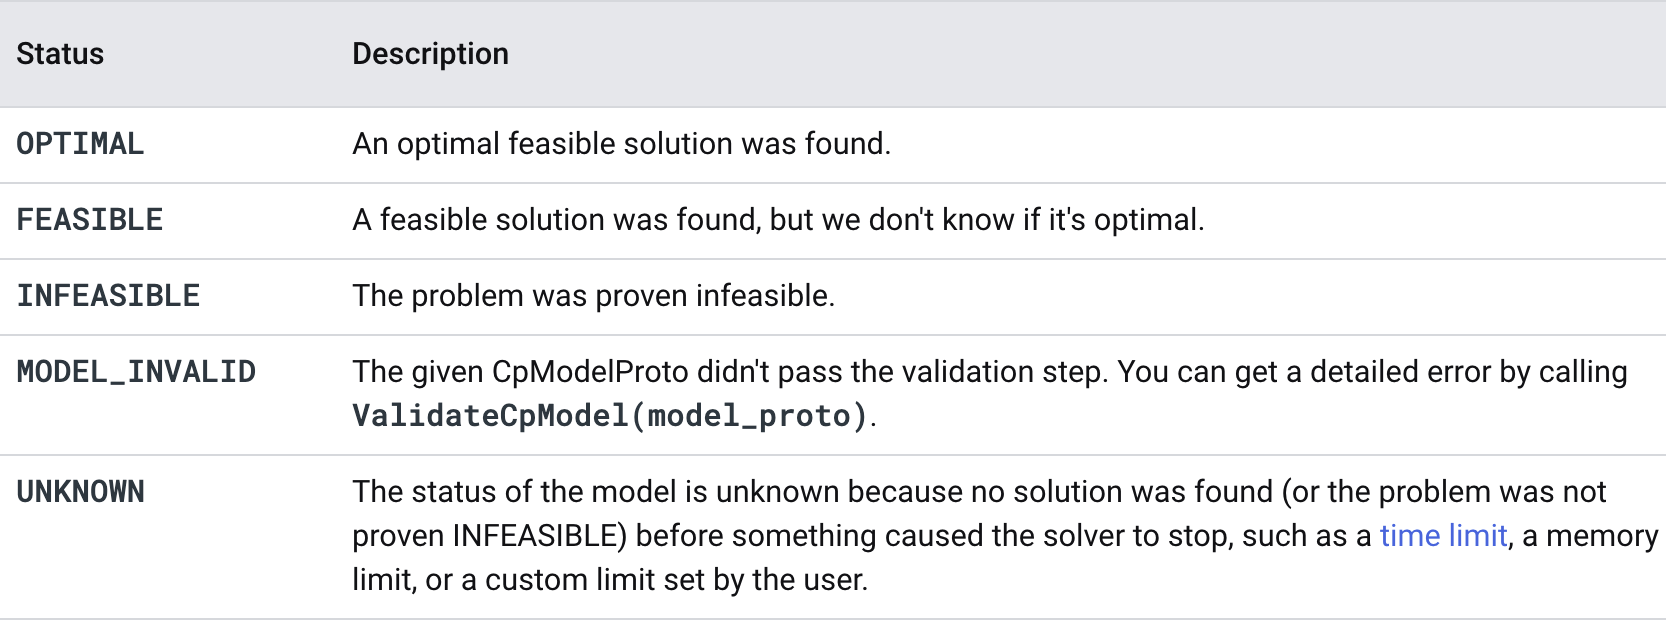

## 모든 타당한 답 출력하기

In [15]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from ortools.sat.python import cp_model


class VarArraySolutionPrinter(cp_model.CpSolverSolutionCallback):
    """Print intermediate solutions."""

    def __init__(self, variables):
        cp_model.CpSolverSolutionCallback.__init__(self)
        self.__variables = variables
        self.__solution_count = 0

    def on_solution_callback(self):
        self.__solution_count += 1
        for v in self.__variables:
            print('%s=%i' % (v, self.Value(v)), end=' ')
        print()

    def solution_count(self):
        return self.__solution_count


def SearchForAllSolutionsSampleSat():
    """Showcases calling the solver to search for all solutions."""
    # Creates the model.
    model = cp_model.CpModel()

    # Creates the variables.
    num_vals = 3
    x = model.NewIntVar(0, num_vals - 1, 'x')
    y = model.NewIntVar(0, num_vals - 1, 'y')
    z = model.NewIntVar(0, num_vals - 1, 'z')

    # Create the constraints.
    model.Add(x != y)

    # Create a solver and solve.
    solver = cp_model.CpSolver()
    solution_printer = VarArraySolutionPrinter([x, y, z])
    status = solver.SearchForAllSolutions(model, solution_printer)

    print('Status = %s' % solver.StatusName(status))
    print('Number of solutions found: %i' % solution_printer.solution_count())


SearchForAllSolutionsSampleSat()

x=1 y=2 z=0 
x=1 y=0 z=0 
x=2 y=0 z=0 
x=2 y=1 z=0 
x=2 y=1 z=1 
x=2 y=0 z=1 
x=1 y=0 z=1 
x=1 y=2 z=1 
x=1 y=2 z=2 
x=1 y=0 z=2 
x=2 y=0 z=2 
x=2 y=1 z=2 
x=0 y=1 z=2 
x=0 y=1 z=1 
x=0 y=1 z=0 
x=0 y=2 z=0 
x=0 y=2 z=1 
x=0 y=2 z=2 
Status = OPTIMAL
Number of solutions found: 18


## 최적화 문제 (정수 요건)

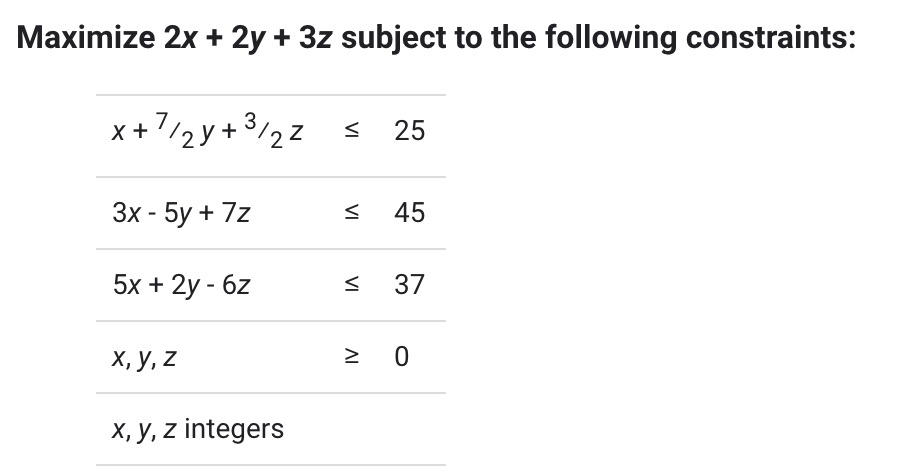
- 계수가 정수가 아니면 이를 처리하기 위해서 최소공배수를 (충분히 큰 값을) 곱해준다
- 변수가 정수인 제약 조건 참조

In [16]:
from __future__ import print_function
from ortools.sat.python import cp_model


model = cp_model.CpModel()
var_upper_bound = max(50, 45, 37)
x = model.NewIntVar(0, var_upper_bound, 'x')
y = model.NewIntVar(0, var_upper_bound, 'y')
z = model.NewIntVar(0, var_upper_bound, 'z')

model.Add(2*x + 7*y + 3*z <= 50)
model.Add(3*x - 5*y + 7*z <= 45)
model.Add(5*x + 2*y - 6*z <= 37)

model.Maximize(2*x + 2*y + 3*z)

solver = cp_model.CpSolver()
status = solver.Solve(model)

if status == cp_model.OPTIMAL:
    print('Maximum of objective function: %i' % solver.ObjectiveValue())
    print()
    print('x value: ', solver.Value(x))
    print('y value: ', solver.Value(y))
    print('z value: ', solver.Value(z))

Maximum of objective function: 35

x value:  7
y value:  3
z value:  5
